In [1]:
#Import everything from biocrnpyler
from biocrnpyler import *

In [2]:
#Example: Model the CRN consisting of: A --> 2B, 2B <--> B + C where C has the same name as B but a new material
A = Species("A", material_type = "m1", attributes = ["attribute"])
B = Species("B", material_type = "m1")
C = Species("B", material_type = "m2")
D = Species("D")

print("Species can be printed to show their string representation:", A, B, C, D)

#Reaction Rates
k1 = 3.
k2 = 1.4
k2rev = 0.15

#Reaciton Objects
R1 = Reaction.from_massaction([A], [B, B], k_forward = k1)
R2 = Reaction.from_massaction([B], [C, D], k_forward = k2)

print("\nReactions can be printed as well:\n", R1,"\n", R2)

#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D], reactions = [R1, R2])

#CRNs can be printed in two different ways
print("\nDirectly printing a CRN shows the string representation of the species used in BioCRNpyler:")
print(CRN)

print("\nCRN.pretty_print(...) is a function that prints a more customizable version of the CRN, but doesn't show the proper string representation of species.")
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

Species can be printed to show their string representation: m1_A_attribute m1_B m2_B D

Reactions can be printed as well:
 m1[A(attribute)] --> 2m1[B] 
 m1[B] --> m2[B]+D

Directly printing a CRN shows the string representation of the species used in BioCRNpyler:
Species = m1_A_attribute, m1_B, m2_B, D
Reactions = [
	m1[A(attribute)] --> 2m1[B]
	m1[B] --> m2[B]+D
]

CRN.pretty_print(...) is a function that prints a more customizable version of the CRN, but doesn't show the proper string representation of species.
Species (4) = {0. m1[A(attribute)] init_conc = 0, 1. m1[B] init_conc = 0, 2. m2[B] init_conc = 0, 3. D init_conc = 0}

Reactions (2) = [
0. m1[A(attribute)] --> 2m1[B]
 Kf=k_forward * m1_A_attribute
  k_forward=3.0

1. m1[B] --> m2[B]+D
 Kf=k_forward * m1_B
  k_forward=1.4

]


The compiled network can be simulated with roadrunner. 

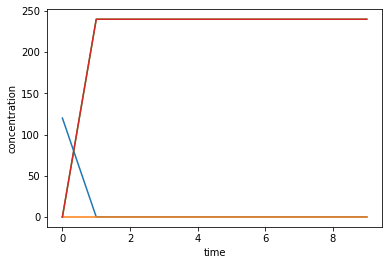

'    time, [m1_A_attribute],      [m1_B], [m2_B], [D]\n [[    0,              120,           0,      0,   0],\n  [    1,     -1.19921e-31, 4.59414e-26,    240, 240],\n  [    2,     -7.49388e-32, 2.87095e-26,    240, 240],\n  [    3,     -2.99568e-32, 1.14776e-26,    240, 240],\n  [    4,     -2.13856e-35, 9.74894e-30,    240, 240],\n  [    5,     -2.07307e-35, 9.45045e-30,    240, 240],\n  [    6,     -2.00759e-35, 9.15197e-30,    240, 240],\n  [    7,     -1.94211e-35, 8.85348e-30,    240, 240],\n  [    8,     -1.87662e-35,   8.555e-30,    240, 240],\n  [    9,     -1.81114e-35, 8.25651e-30,    240, 240]]\n'

In [26]:
try:
    import roadrunner
    x0 = {str(A):120}
    timepoints = range(0,10)
    result = CRN.simulate_with_roadrunner(timepoints, initial_condition_dict = x0)
    import pylab
    pylab.plot (result[:,0],result[:,1:])
    pylab.xlabel('time')
    pylab.ylabel('concentration')
    pylab.show()
except ModuleNotFoundError:
    warnings.warn('libroadrunner was not found, please install libroadrunner')

In [9]:
rr = None
try:
    import roadrunner
    x0 = {str(A):120}
    rr = CRN.simulate_with_roadrunner(timepoints=range(0,10), initial_condition_dict = x0, return_roadrunner=True)
except ModuleNotFoundError:
    warnings.warn('libroadrunner was not found, please install libroadrunner')


['[m1_A_attribute]', '[m1_B]', '[m2_B]', '[D]']


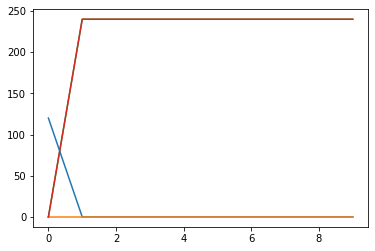

In [32]:
if rr is not None:
    rr.reset()
    res2 = rr.simulate( start=0, end=9, points=10)
    pylab.plot (res2[:,0],res2[:,1:])
    pylab.legend(rr.timeCourseSelections[1:])
    pylab.show()


The reset function is needed to simulate the ODE from the inital condition not from the end of the last simulation time point. 